In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.6 MB/s 
     |████████████████████████████████| 9.8 MB 29.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [24]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
# from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders  
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Github/m_tech/Datasets/input.xlsx')
df.head()

,Date,SalesVolume
0,1995-01-01,47639.0
1,1995-02-01,47880.0
2,1995-03-01,67025.0
3,1995-04-01,56925.0
4,1995-05-01,64192.0


In [10]:
len(df)

318

In [6]:
df = df.dropna()
df['Date'] = pd.DatetimeIndex(df['Date'])
df = df.groupby('Date').sum()
#Settting a Monthly frequency and also to the first day of the month
df = df.asfreq('MS')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

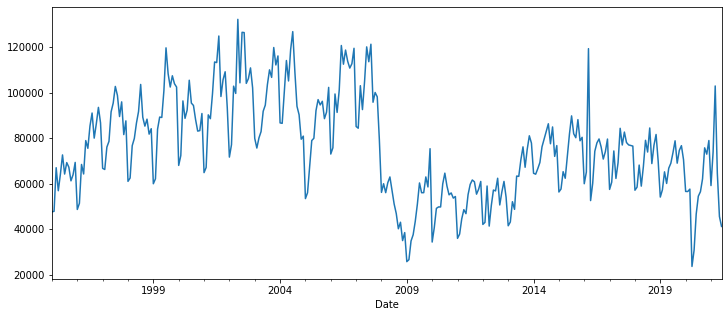

In [7]:
df['SalesVolume'].plot(figsize=(12,5));

In [8]:
adf_test(df['SalesVolume'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.544328
p-value                   0.105058
# lags used              13.000000
# observations          304.000000
critical value (1%)      -3.452045
critical value (5%)      -2.871095
critical value (10%)     -2.571861
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
auto_arima(df['SalesVolume'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  318
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3426.343
Date:                Tue, 14 Dec 2021   AIC                           6858.687
Time:                        13:10:47   BIC                           6869.964
Sample:                             0   HQIC                          6863.191
                                - 318                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6459      0.073      8.833      0.000       0.503       0.789
ma.L1         -0.8926      0.053    -16.741      0.000      -0.997      -0.788
sigma2      1.495e+08   1.93e-10   7.76e+17      0.000     1.5e+08     1.5e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               102.43
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.53
Prob(H) (two-sided):                  0.80   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+33. Standard errors may be unstable.
"""

In [53]:
# Set one month for testing
train = df.iloc[:305]
test = df.iloc[305:]

In [65]:
model=sm.tsa.statespace.SARIMAX(df['SalesVolume'],order=(1, 1, 1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SalesVolume   No. Observations:                  318
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3426.343
Date:                Tue, 14 Dec 2021   AIC                           6858.687
Time:                        14:23:21   BIC                           6869.964
Sample:                    01-01-1995   HQIC                          6863.191
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6459      0.073      8.833      0.000       0.503       0.789
ma.L1         -0.8926      0.053    -16.741      0.000      -0.997      -0.788
sigma2      1.495e+08   1.93e-10   7.76e+17      0.000     1.5e+08     1.5e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               102.43
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.53
Prob(H) (two-sided):                  0.80   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+33. Standard errors may be unstable.
"""

In [66]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('SARIMAX(1,1,1) Predictions')

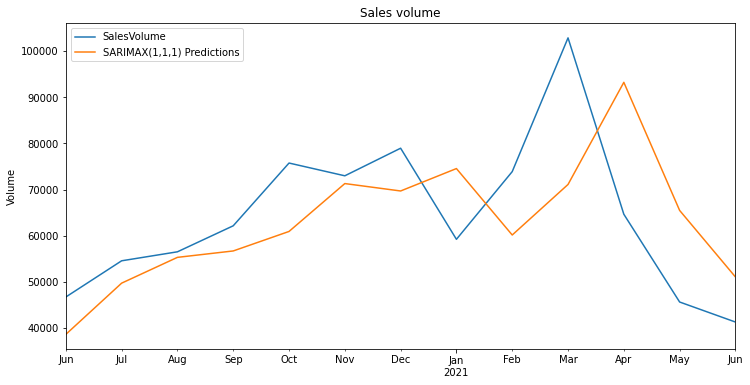

In [67]:
title = 'Sales volume'
ylabel='Volume'
xlabel='' # we don't really need a label here

ax = test['SalesVolume'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [57]:
auto_arima(df['SalesVolume'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  318
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3426.343
Date:                Tue, 14 Dec 2021   AIC                           6858.687
Time:                        13:28:19   BIC                           6869.964
Sample:                             0   HQIC                          6863.191
                                - 318                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6459      0.073      8.833      0.000       0.503       0.789
ma.L1         -0.8926      0.053    -16.741      0.000      -0.997      -0.788
sigma2      1.495e+08   1.93e-10   7.76e+17      0.000     1.5e+08     1.5e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               102.43
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.53
Prob(H) (two-sided):                  0.80   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+33. Standard errors may be unstable.
"""

In [58]:
model = ARIMA(train['SalesVolume'],  order=(1, 0, 0),  seasonal_order=(0, 1, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      SalesVolume   No. Observations:                  305
Model:             ARIMA(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood               -3148.304
Date:                          Tue, 14 Dec 2021   AIC                           6300.609
Time:                                  13:28:19   BIC                           6307.969
Sample:                              01-01-1995   HQIC                          6303.557
                                   - 05-01-2020                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7682      0.018     41.522      0.000       0.732       0.804
sigma2      1.164e+08   3.34e-11   3.48e+18      0.000    1.16e+08    1.16e+08
===================================================================================
Ljung-Box (L1) (Q):                   8.80   Jarque-Bera (JB):               315.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.78
Prob(H) (two-sided):                  0.89   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.54e+33. Standard errors may be unstable.
"""

In [59]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARIMA(1,1,1) Predictions')

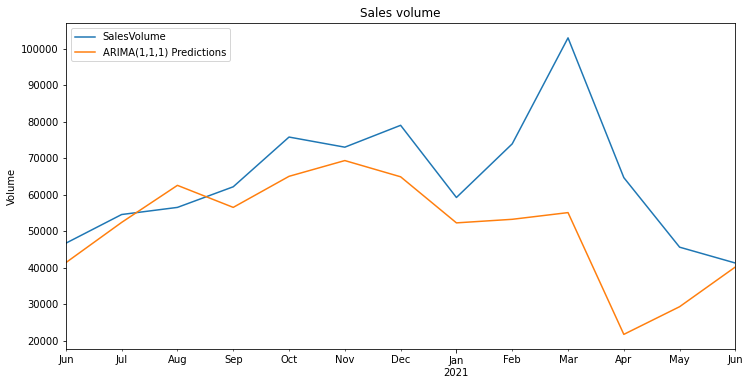

In [60]:
title = 'Sales volume'
ylabel='Volume'
xlabel='' # we don't really need a label here

ax = test['SalesVolume'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [68]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['SalesVolume'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 244499732.3


In [69]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['SalesVolume'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 15636.48721


In [70]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['SalesVolume'], predictions)
print(f'ARIMA(1,1,1) MAE Error: {error:11.10}')

ARIMA(1,1,1) MAE Error: 12667.59707


In [71]:
from sklearn.metrics import mean_absolute_percentage_error

error = mean_absolute_percentage_error(test['SalesVolume'], predictions)
print(f'ARIMA(1,1,1) MAPE Error: {error:11.10}')

ARIMA(1,1,1) MAPE Error: 0.1984680295
